
### Project Title : Linear Regression Gradient Descent using Pytorch ###
Code Owner : Parth Gera
* gera2@illinois.edu
* https://github.com/geraparth
* https://www.linkedin.com/in/parth-gera-6161aa107/



#### This script is an example of how one can implement linear regression gradient descent using Pytorch. The learning rate/stepsize here has been decided basis the maximum eigen value of the Hessian of the input variables. Using optimization theory, one can prove that it is the optimal step size one should use for L-smooth functions ####

#### The data used for this excercise is the real estate price prediction from : https://www.kaggle.com/quantbruce/real-estate-price-prediction ###

In [85]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [86]:
def getdata():

    """
    To take input data from repository, split into test and train, convert into tensor

    Parameters:


    Returns:
            train_x_ten : Tensor containing x parameters of the training set of the model
            val_x_ten : Tensor containing x parameters of the validation set of the model
            train_y_ten : Tensor containing y variable of the training set of the model
            val_y_ten : Tensor containing y variable of the validation set of the model

    """
    
    #Reading csv from directory and filtering x and y variables
    data = pd.read_csv('Real estate.csv')
    x_columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station'
                 ,'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
    data_y = data['Y house price of unit area']
    data_x = data[x_columns]

    #Splitting train and validation set and converting to tensors
    train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size=0.25, random_state=10)
    train_x_ten = torch.from_numpy(np.array(train_x).astype(np.float32))
    val_x_ten = torch.from_numpy(np.array(val_x).astype(np.float32))
    train_y_ten = torch.from_numpy(np.array(train_y).astype(np.float32)).reshape((len(train_y), 1))
    val_y_ten = torch.from_numpy(np.array(val_y).astype(np.float32)).reshape((len(val_y), 1))

    return train_x_ten, val_x_ten, train_y_ten, val_y_ten

In [87]:
def linear_gd(X, Y, lrate):

    """
    To take X-train and y-train as inputs and return the weight parameters after executing gradient descent

    Parameters:
            X : Tensor (train) with all X parameters
            Y : Tensor (train) with the y variable


    Returns:
            weight : Tensor containing estimated weights of all the variables parameters minimizing loss 
    """
    
    #Getting data points (n) and dimensions (d)
    n = X.size()[0]
    d = X.size()[1]
    
    #Defining variables for GD. Also incorporating the bias term into input
    y_pred = Variable(torch.zeros((n, 1)))
    weight = Variable(torch.zeros((d+1, 1)), requires_grad = True)
    loss = Variable(torch.zeros([1]))
    bias_term = torch.ones((n, 1))
    X_input = torch.cat((bias_term, X), 1)
    losses = {}
    num_iter = 0
    loss_delta = 10

    #Stopping criteria for gradient descent. The range of last 10 avg. losses should be < 10e-3
    while loss_delta > 0.001:

        y_pred = torch.matmul(X_input, weight)
        loss = (1.0/(2.0*n))*sum((y_pred - Y)**2)
        loss.backward()
        weight.data -= lrate*weight.grad.data
        weight.grad = None
        losses[num_iter] = loss.detach().numpy()
        num_iter += 1

        #Print losses for every 1000th iteration, and evaluate stopping criteria
        if num_iter%1000 == 0:

            print("Iteration:", num_iter)
            print("Loss is:", loss)
            loss_delta = max(list(losses.values())[-10:]) - min(list(losses.values())[-10:])

    return weight, losses

In [88]:
def make_predictions(X, weights):
   
    """
    To make predictions on the train/validation set using weight matrix obtained from gradient descent

    Parameters:
            X : Tensor (train/validation) with all X parameters
            weights : Tensor with the weights obtained from GD


    Returns:
            predictions : Tensor containing predictions for the train/validation set 
    """
    n = X.size()[0]
    bias_term = torch.ones((n, 1))
    X_input = torch.cat((bias_term, X), 1)
    predictions = torch.matmul(X_input, weights)
    
    return predictions

In [89]:
def mape_calc(Y_pred, Y):
    """
    To calculate mean absolute percentage error of the prediction vs actual

    Parameters:
            Y_pred : Tensor with predictions
            Y : Tensor with the actual values


    Returns:
            A float value which is the mean absolute percentage error
    """
    
    return (sum(abs(Y_pred  - Y)*100.00/Y)/(Y.size()[0])).detach().numpy()    

In [90]:
#Loading dataset
x_train, x_val, y_train, y_val = getdata()

Iteration: 1000
Loss is: tensor([113.4755], grad_fn=<MulBackward0>)
Iteration: 2000
Loss is: tensor([67.2855], grad_fn=<MulBackward0>)
Iteration: 3000
Loss is: tensor([55.0822], grad_fn=<MulBackward0>)
Iteration: 4000
Loss is: tensor([51.8010], grad_fn=<MulBackward0>)
Iteration: 5000
Loss is: tensor([50.9184], grad_fn=<MulBackward0>)
Iteration: 6000
Loss is: tensor([50.6807], grad_fn=<MulBackward0>)
Iteration: 7000
Loss is: tensor([50.6164], grad_fn=<MulBackward0>)


Text(0.5, 1.0, 'Gradient Descent Loss curve')

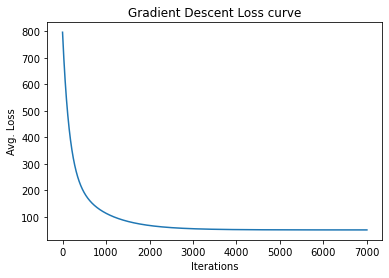

In [91]:
#Deciding on learning rate
hessian = torch.matmul(x_train.T, x_train)
eigen_values = torch.linalg.eig(hessian)
#Using non-linear optimization theory
max_lr = 1/max(torch.real(eigen_values[0]))

#Running gradient descent
X_run = GradientDescent 
weight, losses = X_run.linear_gd(x_train, y_train, max_lr)
plt.plot(losses.keys(), losses.values())
plt.xlabel('Iterations')
plt.ylabel('Avg. Loss')
plt.title('Gradient Descent Loss curve')

In [92]:
#Making Predictions
train_pred = make_predictions(x_train, weight)
val_pred = make_predictions(x_val, weight)

In [93]:
#Train Test Accuracy
train_error = mape_calc(train_pred, y_train)
val_error = mape_calc(val_pred, y_val)

print("Train error is: ", train_error[0], "%")
print("Validation error is: ", val_error[0], "%")

Train error is:  21.969053 %
Validation error is:  23.56081 %
